In [1]:
from utils import DATA_DIR


import json

with open(DATA_DIR + '/batch_5/batch_5_parsed_reviewed.json', 'r') as file:
    data = json.load(file)



KeyError: 'quality_review'

In [36]:
data[3]['quality_review'].keys()

dict_keys(['Overall - Completness', 'User - Natural & Realistic', 'User - Coherent Follow ups', 'Assistant - Code Quality', 'Assistant - Text Quality', 'Assistant - Markdown Formatting'])

In [38]:
import pandas as pd


def calculate_average_score(quality_review):
    scores = [details['score'] for category, details in quality_review.items()]
    return sum(scores) / len(scores) if scores else 0

def extract_issues_markdown(quality_review):
    issues = [issue for category, details in quality_review.items() for issue in details['issues']]
    return '\n'.join(f"- {issue}" for issue in issues)

mapped_data = []
for item in data:
    task_link = item['task_link']
    quality_review = item.get('quality_review', {})
    average_score = calculate_average_score(quality_review)
    combined_issues_md = extract_issues_markdown(quality_review)
    minimum_score_details = min(quality_review.items(), key=lambda item: item[1]['score']) if quality_review else (None, {'score': 0})
    minimum_score = minimum_score_details[1]['score']
    minimum_aspect = minimum_score_details[0] if minimum_score_details[0] else ''
    mapped_data.append({
        'task_link': task_link,
        'average_score': average_score,
        'combined_issues_md': combined_issues_md,
        'minimum_score': minimum_score,
        'minimum_aspect': minimum_aspect
    })


df = pd.DataFrame(mapped_data)
df

,task_link,average_score,combined_issues_md,minimum_score,minimum_aspect
0,https://colab.research.google.com/drive/1lHYB-...,0.000000,,0,
1,https://colab.research.google.com/drive/1rfNQU...,0.000000,,0,
2,https://colab.research.google.com/drive/1qJPPq...,4.666667,- Slightly verbose explanations in some respon...,4,Assistant - Text Quality
3,https://colab.research.google.com/drive/1xw5RA...,4.333333,- The kth_smallest method is inefficient for l...,3,Assistant - Code Quality
4,https://colab.research.google.com/drive/1d613I...,4.333333,- User could specify the programming language ...,4,User - Natural & Realistic
...,...,...,...,...,...
1057,https://colab.research.google.com/drive/1x_-q3...,4.500000,- The code lacks comments explaining its purpo...,4,Assistant - Code Quality
1058,https://colab.research.google.com/drive/1lekWL...,4.500000,- User's second message could be more specific...,4,User - Coherent Follow ups
1059,https://colab.research.google.com/drive/1QXk9F...,4.333333,- User's initial message could be more concise...,4,User - Natural & Realistic
1060,https://colab.research.google.com/drive/1qNCDX...,4.500000,- The SASS code example is basic and may not r...,4,Assistant - Code Quality


In [39]:
df_sorted = df.sort_values(by='average_score')
df_filtered = df_sorted[df_sorted['average_score'] > 0]
df_filtered

,task_link,average_score,combined_issues_md,minimum_score,minimum_aspect
1047,https://colab.research.google.com/drive/1UTMWv...,1.000000,"- The user's message is empty, no conversation...",1,Overall - Completness
735,https://colab.research.google.com/drive/1qxWaR...,1.000000,"- The user's message is empty, no conversation...",1,Overall - Completness
452,https://colab.research.google.com/drive/1-CUwW...,1.000000,"- The user's message is empty, no conversation...",1,Overall - Completness
947,https://colab.research.google.com/drive/1SYie4...,1.000000,"- The conversation is empty, no interaction oc...",1,Overall - Completness
432,https://colab.research.google.com/drive/1MOsGU...,2.333333,- The conversation is incomplete; it lacks the...,1,Overall - Completness
...,...,...,...,...,...
788,https://colab.research.google.com/drive/1OuG92...,5.000000,,5,Overall - Completness
791,https://colab.research.google.com/drive/1AksuI...,5.000000,,5,Overall - Completness
327,https://colab.research.google.com/drive/1-KSDl...,5.000000,,5,Overall - Completness
153,https://colab.research.google.com/drive/1Ay4PR...,5.000000,,5,Overall - Completness


In [18]:
df_filtered[df_filtered['average_score'] > 2.9]

,task_link,average_score,combined_issues_md
406,https://colab.research.google.com/drive/1Fxnrc...,3.166667,- Assistant's response lacks detail on the sol...
391,https://colab.research.google.com/drive/1Y5AzB...,3.166667,- The conversation ends abruptly without resol...
240,https://colab.research.google.com/drive/1MyTWT...,3.166667,- The user's last message seems disconnected f...
385,https://colab.research.google.com/drive/1xmfS8...,3.333333,- Assistant's final response is abrupt and lac...
705,https://colab.research.google.com/drive/1idjNv...,3.333333,- The conversation lacks a closing response fr...
...,...,...,...
788,https://colab.research.google.com/drive/1OuG92...,5.000000,
791,https://colab.research.google.com/drive/1AksuI...,5.000000,
327,https://colab.research.google.com/drive/1-KSDl...,5.000000,
153,https://colab.research.google.com/drive/1Ay4PR...,5.000000,


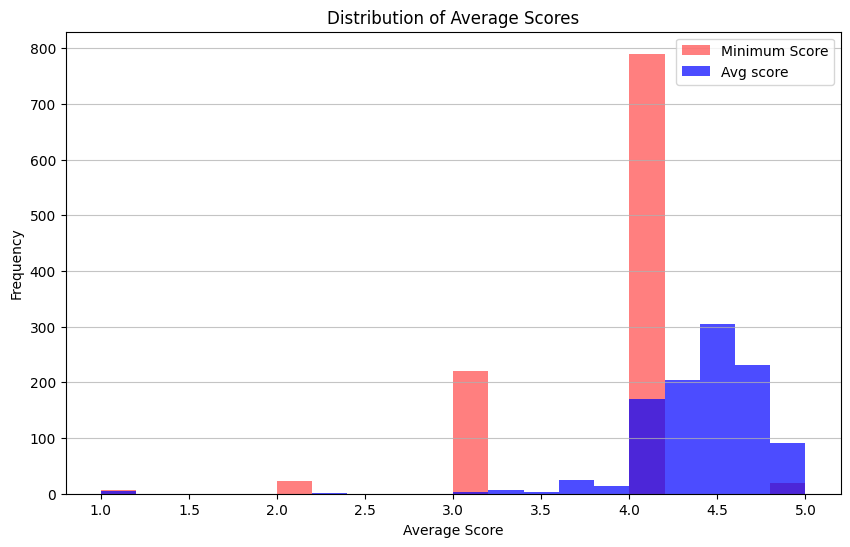

In [28]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['minimum_score'], bins=20, alpha=0.5, color='red', label='Minimum Score')
plt.hist(df_filtered['average_score'], bins=20, alpha=0.7, color='blue', label='Avg score')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()

plt.show()

In [43]:

import gspread
from gspread_dataframe import set_with_dataframe

from utils import service_account_path

PROD_OUTPUT_SHEET_URL = "https://docs.google.com/spreadsheets/d/1wUWll720oz6Rnc4YKHeWFWbZbTMWbda2rfVh8jPLU2g"

def set_sheet_with_df(sheet_url, sheet_name, df):
    gc = gspread.service_account(filename=service_account_path)
    sh = gc.open_by_url(sheet_url)
    try:
        worksheet = sh.worksheet(sheet_name)
    except gspread.WorksheetNotFound:
        worksheet = sh.add_worksheet(title=sheet_name, rows=1, cols=1)

    set_with_dataframe(worksheet, df, resize=True)

set_sheet_with_df(PROD_OUTPUT_SHEET_URL, 'reviews_test', df_low_scores)

In [42]:
df_low_scores = df_filtered[df_filtered['minimum_score'] < 3].sort_values(by='minimum_score')
df_low_scores


,task_link,average_score,combined_issues_md,minimum_score,minimum_aspect
1047,https://colab.research.google.com/drive/1UTMWverEFLkwTVwqkbQ0zspSan4e9ZM4,1.000000,"- The user's message is empty, no conversation initiated.\n- No back and forth exchange occurred.\n- Conversation flow is non-existent.\n- User message is empty, not resembling a real interaction.\n- User's message is empty, no follow-up possible.\n- No code provided to assess.\n- Assistant did not provide any text to evaluate.\n- Assistant did not generate any messages to evaluate.",1,Overall - Completness
735,https://colab.research.google.com/drive/1qxWaR9H_cqX-8ImGYnjOyU3IfMxP5x2q,1.000000,"- The user's message is empty, no conversation initiated.\n- No back and forth exchange occurred.\n- Conversation flow is non-existent.\n- User message is empty, not resembling a real conversation.\n- User's initial message is empty, no follow-up possible.\n- No code provided to assess.\n- Assistant did not generate any text.\n- Impossible to judge text quality without content.\n- No content provided by the user to evaluate.",1,Overall - Completness
452,https://colab.research.google.com/drive/1-CUwWWN_P5IpS4Ur_DvSYXLh-pGvnWxN,1.000000,"- The user's message is empty, no conversation initiated.\n- No back and forth exchange occurred.\n- Conversation flow is non-existent.\n- User message is empty, not resembling a real conversation.\n- User's initial message is missing, impossible to follow up.\n- No conversation provided to assess.\n- Empty user message.\n- Assistant did not provide any response.\n- No content to evaluate markdown formatting.",1,Overall - Completness
947,https://colab.research.google.com/drive/1SYie4Ox_PrNtKFlm6hiVESYyRAuxdmYO,1.000000,"- The conversation is empty, no interaction occurred.\n- User message is empty, not resembling a real conversation.\n- User's message is empty, no follow-up provided.\n- No conversation provided to assess.\n- Assistant's message is missing.\n- No content provided, impossible to judge markdown formatting.",1,Overall - Completness
432,https://colab.research.google.com/drive/1MOsGUXUgPXQnhQgyq4ip7_PsxpX07GqK,2.333333,- The conversation is incomplete; it lacks the assistant's response.\n- No code provided by the assistant to judge.\n- Assistant did not provide any response.\n- No assistant message to evaluate markdown formatting.,1,Overall - Completness
240,https://colab.research.google.com/drive/1MyTWTDXypt5mxJNqz-SveUHefghrgick,3.166667,- The user's last message seems disconnected from the previous flow.\n- Last user message is unclear and seems out of context.\n- Last user message unclear and seems disconnected from the conversation flow.\n- No code provided to assess.\n- Assistant did not fulfill user's request for pdb tutorial.\n- Conversation lacks technical depth for code quality evaluation.\n- Assistant's response could be more concise in the last message.\n- Some responses lack actionable debugging steps.\n- No use of code blocks for code-related terms.\n- Lack of bullet points for step-by-step instructions.\n- No emphasis on key concepts or terms.,1,Assistant - Code Quality
551,https://colab.research.google.com/drive/1IsVx1mzs6ImWNmmDcQupK5M0ZKz4V8nN,3.666667,"- No code generated by the assistant to judge.\n- The conversation lacks any code-related content from the assistant.\n- Assistant's responses could be slightly more concise.\n- Assistant's messages lack markdown enhancements.\n- No use of lists, headers, or code blocks.\n- Formatting does not aid readability.",1,Assistant - Code Quality
61,https://colab.research.google.com/drive/1fMHIyxJ0v_a5-vXH_32iVU951k0QAywQ,4.000000,- The conversation ends abruptly without a final user confirmation or further questions.\n- The code does not correctly handle range updates.\n- The update method logic is flawed.\n- No lazy propagation implemented for range updates.\n- Slight verbosity in explanations\n- Could be more concise in places\n- Assistant's code block lacks language specific

In [2]:
from src.gdrive_api.folder_upload import upload_folder
from utils import service_account_path
upload_folder(service_account_path, '/home/saya/Downloads/del/Batch 5', 'https://drive.google.com/drive/folders/1pEC7hlH3DTMUrkEHeDZduG7AyZf2lSRR', is_url=True, max_threads=30)



Synced directory structure: 0 out of 0 directories.
Processing 1j2gQ54jREZPDo-LRyTQUkyEF1H67kUHp.json 1059 left after this one
Getting file id...
Processing 1FsXfRvjAjTy8StlvJwunVBgmXiIVO-0G.json 1058 left after this one
Getting file id...
Processing 1oKQXbx1qHhlZiQHq8rsGI6-It8wUZG2F.json 1057 left after this one
Processing 16mIxxbiVG3BDYlKhrx0hGZ_8gDNUr8GA.json 1056 left after this one
Getting file id...
Getting file id...
Processing 1XKJPaGk-ijEWa0vmf7CFpfVzygxlpJXx.json 1055 left after this one
Getting file id...
Processing 1ybvv9uwJ2EMmHlfs9i2eAfz37qnv2uEr.json 1054 left after this one
Getting file id...
Processing 12It1-2mgSUtm1amtvxYh-HR9r82k2q94.json 1053 left after this one
Processing 1b_pQa8rYR5bR6WbAdMAKifChhz7MrnTF.json 1052 left after this one
Processing 1oqZCRiRTpo7v-ZTOK_QmbZGbsffKOeBj.json 1051 left after this one
Processing 1Ym3ek9-7Kyjc_zfXJGFH6xObiNutKXSK.json 1050 left after this one
Getting file id...
Getting file id...
Processing 1mud1XnD12t02czIETCwoCzd5aehCZAUU.j

{'1oKQXbx1qHhlZiQHq8rsGI6-It8wUZG2F.json': None,
 '1XKJPaGk-ijEWa0vmf7CFpfVzygxlpJXx.json': None,
 '16mIxxbiVG3BDYlKhrx0hGZ_8gDNUr8GA.json': None,
 '10Eaapm9QHczC7D3AAU7SRm5jX70w16mi.json': None,
 '1cnFP3TXmgBG7F5z-H2cdX9eAREQd6a3U.json': None,
 '1Tv3NVB8NS4W345iXXnwvJrMGQyPrUdF5.json': None,
 '1Sd4rulQ_5f_SUWQ2eA4eSmioYBZpVjeN.json': None,
 '1lhfB2DDg_YBKMpJY1t8VMswtZmty8LPb.json': 'https://drive.google.com/uc?id=17b9HpbXVH4zzOMYXPuU09DyrRV2x7hdX',
 '1NyVK_J_8Lqj5SMbHEI5W9RJ0ZxU8ulD5.json': 'https://drive.google.com/uc?id=1vahBv0mUwAHFVpKQN3_OCXLUOoJ4131i',
 '1mud1XnD12t02czIETCwoCzd5aehCZAUU.json': 'https://drive.google.com/uc?id=1lrewwbawbyQvXJog9weMLEZpRk4zotAi',
 '1NVoHHlc7BFy12uW925LJt2AWcyHJh_Ba.json': 'https://drive.google.com/uc?id=10LovtegBppEaDrSrRPv60mYDNtOsgfNq',
 '1Ym3ek9-7Kyjc_zfXJGFH6xObiNutKXSK.json': 'https://drive.google.com/uc?id=14YAsJDvIc388rAVGM1cileAReP0CZNuG',
 '1j2gQ54jREZPDo-LRyTQUkyEF1H67kUHp.json': 'https://drive.google.com/uc?id=1mYuY5KYQjeW6q6auKWh2dCCEzX

In [3]:
from src.gdrive_api.utils import list_all_files_in_folder
from src.gdrive_api.auth import build_service

service = build_service(service_account_path)
file_list = list_all_files_in_folder(service, '1pEC7hlH3DTMUrkEHeDZduG7AyZf2lSRR')
len(file_list)

Processing page number 2...
Processing page number 2...
Processing page number 2...
Processing page number 2...
Processing page number 2...
Processing page number 2...
Processing page number 2...
Processing page number 2...
Processing page number 2...
Processing page number 2...


1060